# Project Milestone 2

## Load the Data

In [1]:
#Import important libraries
import tarfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import pickle
import sklearn

In [2]:
DATA_FOLDER = 'Data/'
CHARACTER_DATASET = DATA_FOLDER + 'character.metadata.tsv'
NLP_DATASET = DATA_FOLDER + 'corenlp_plot_summaries.tar'
MOVIE_DATASET = DATA_FOLDER + 'Movie.metadata.tsv'
SUMMARIES_DATASET = DATA_FOLDER + 'plot_summaries.txt.gz'
DEFAULT_COMPRESSION = 'gzip'

In [3]:
def load_metadata(path, column_names, header=None, low_memory=False):
    return pd.read_table(path, header=header, names=column_names)

In [7]:
columns_character = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height_meters', 'Actor_ethnicity_Freebase_ID', 'Actor_name', 'Actor_age_at_movie_release', 'Freebase_character_actor_map_ID', 'Freebase_character_ID', 'Freebase_actor_ID']
columns_movie = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name','Movie_release_date','Movie_box_office_revenue', 'Movie_runtime','Movie_languages','Movie_countries','Movie_genres' ]

characters = load_metadata(CHARACTER_DATASET,column_names=columns_character)
movies = load_metadata(MOVIE_DATASET,column_names=columns_movie)

Formatting the data: 

In [11]:
def format_multiple(chain,deb,step):
    res = chain.split('"')[deb::step]
    return res

In [12]:
movies.Movie_genres = movies.Movie_genres.apply(format_multiple,deb=3,step=4)
movies.Movie_countries = movies.Movie_countries.apply(format_multiple,deb=3,step=4)
movies.Movie_languages = movies.Movie_languages.apply(format_multiple,deb=3,step=4)

In [13]:
keys = ['Movie_languages','Movie_countries','Movie_genres']
for key in keys:
    nb = len(movies[movies[key].apply(len) == 0])
    print('{nb} movies without {key} ({percentage:.2f}\% of the dataset)'.format(nb=nb,key=key, percentage=nb*100/len(movies)))

13866 movies without Movie_languages (16.96\% of the dataset)
8154 movies without Movie_countries (9.98\% of the dataset)
2294 movies without Movie_genres (2.81\% of the dataset)


## Exploring the Data

Time to look at the movies genres

In [34]:
movies.Movie_genres.head()

0    [Thriller, Science Fiction, Horror, Adventure,...
1     [Mystery, Biographical film, Drama, Crime Drama]
2                               [Crime Fiction, Drama]
3    [Thriller, Erotic thriller, Psychological thri...
4                                              [Drama]
Name: Movie_genres, dtype: object

In [40]:
#How many movies per genre
genres ={}
for i in movies.Movie_genres:
    for j in i:
        if j not in genres:
            genres[j] = 1
        else:
            genres[j]+=1

In [58]:
print(genres)

{'Thriller': 8744, 'Science Fiction': 3052, 'Horror': 5280, 'Adventure': 4963, 'Supernatural': 641, 'Action': 8798, 'Space western': 13, 'Mystery': 3195, 'Biographical film': 1198, 'Drama': 34007, 'Crime Drama': 563, 'Crime Fiction': 6948, 'Erotic thriller': 209, 'Psychological thriller': 1331, 'Short Film': 8141, 'Silent film': 5250, 'Indie': 6897, 'Black-and-white': 9094, 'Comedy': 16349, 'Family Film': 4598, 'Fantasy': 2820, 'World cinema': 7155, 'Musical': 4160, 'Japanese Movies': 2322, 'Action/Adventure': 4561, 'Romantic comedy': 2680, 'Ensemble Film': 453, 'Comedy-drama': 1720, 'Romantic drama': 3372, 'Romance Film': 10234, 'Costume drama': 485, 'War film': 2652, 'Epic': 278, 'Period piece': 1758, 'Film adaptation': 1531, 'Animation': 3534, "Children's/Family": 926, "Children's Fantasy": 280, 'Future noir': 33, 'Comedy film': 4362, 'Coming of age': 910, 'Suspense': 759, 'Crime Thriller': 2122, 'Black comedy': 1025, 'Bollywood': 1321, 'Marriage Drama': 190, 'Wuxia': 125, 'Martial 

We can see that there is a very big range in number of movies associated with a genre. There are also typos in here... "'Comdedy': 1"

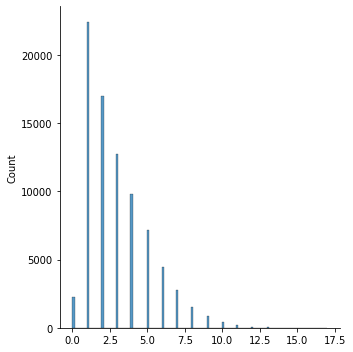

In [69]:
#How many genres per movie
numGenres = []
for i in movies.Movie_genres:
    numGenres.append(len(i))

sns.displot(data=numGenres, kde=False)
#plt.hist(numGenres)
#plt.show()

Most movies have one or two genres.

## Pickling Data

We can use this after cleaning our datasets so that we can use the data faster.

In [10]:
characters.to_pickle("./Data/characters.pkl")
movies.to_pickle("./Data/movies.pkl")

#To unpickle:
# characters = pd.read_pickle("./Data/characters.pkl") 
# movies = pd.read_pickle("./Data/movies.pkl")